# Задание-проект

---
- Датасет: Продажи игр (https://www.kaggle.com/datasets/gregorut/videogamesales)

- Цель: Найти наиболее перспективный жанр игры для потенциальной разработки.
---

## Проверка качества данных

In [251]:
import pandas as pd

data=pd.read_csv('Datasets/vgsales.csv', sep=",")  # Загрузка данных

data.head(10) # Просмотрим 10 значений сверху


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


### Столбцы и их значение

Column | Definition
---|---------
Rank | Рейтинг, основанный на общем объеме продаж
Name | Название игры
Platform | Платформа, для которой была выпущена игра
Year | Год, когда была выпущена игра
Genre | Жанр, к которому относится игра
Publisher |  Издатель, который опубликовал игру
NA_Sales | Продажи в Северной Америке
EU_Sales | Продажи в Европейском союзе
JP_Sales |  Продажи в Японии
Other_Sales | Продажи в другой части мира
Global_Sales |  Общий объем продаж игры по всему миру

In [252]:
print(data.dtypes)  # проверяем типы данных

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [253]:
data.isnull().values.any()  # Чтобы проверить, есть ли какое-то нулевое значение

True

In [254]:
data.isnull().sum().sum()  # Итоговые нулевые значения

329

In [255]:
data.isnull().sum() # Узнаем где находятся нулевые значения и их сколько по итогу

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [256]:
data.duplicated().sum() # В данных нет дубликатов строк

0

In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [258]:
data.dropna(inplace=True)  # Удаляем нулевые значение, чтобы устранить пробелы в данных

In [259]:
data.isnull().sum()  # Проверяем итоговые нулевые значения после удаления


Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

---

## Основные статистические показатели

----

In [260]:
data['Year'].astype(int).min()  # Это показывает, что у нас есть данные с 1980 года и далее

1980

In [261]:
data['Year'].astype(int).max() # Это показывает, что у нас есть данные до 2020 года

2020

In [262]:
data['Year'].nunique()  # В наших данных 39 уникальных лет

39

In [263]:
data['Year'].mean()  

2006.4055613528942

In [264]:
data['Year'].std()

5.8324122195220545

In [265]:
data['Year'].quantile(.25) # 25 процентов значения в столбце "ГОД" меньше 2003 года

2003.0

In [266]:
data['Year'].quantile(.75) # 75 процентов значения в столбце "ГОД" меньше 2010 года

2010.0

In [267]:
data['Name'].count()  # У нас есть в общей сумме 16598 значений в столбце "Name"

16291

In [268]:
data['Name'].nunique()  # unique() представляет количество уникальных значений, которое в столбце "Name" равно 11493

11325

In [269]:
data['Name'].mode() #  Наиболее распространенное значение в нашем столбце "Name"

0    Need for Speed: Most Wanted
Name: Name, dtype: object

In [270]:
data['Name'].value_counts()

Name
Need for Speed: Most Wanted    12
FIFA 14                         9
Ratatouille                     9
LEGO Marvel Super Heroes        9
Cars                            8
                               ..
PGA Tour 96                     1
Game & Wario                    1
Angry Birds                     1
Shadow Hearts: Covenant         1
Know How 2                      1
Name: count, Length: 11325, dtype: int64

In [271]:
data['Platform'].count()  # У нас есть в общей сумме 16598 значений в столбце "Platform"


16291

In [272]:
data['Platform'].nunique()  # unique() представляет количество уникальных значений, которое в столбце "Platform" равно 31. 
                            # Здесь мы видим, что количество уникальных платформ, на которых выпущена игра, меньше, чем количество уникальных игр


31

In [273]:
data['Platform'].mode() #  Наиболее распространенное значение в нашем столбце "Platform", Мы выясняем, что большинство игр было выпущено на nintendo ds

# https://ru.wikipedia.org/wiki/Nintendo_DS


0    DS
Name: Platform, dtype: object

In [274]:
data['Platform'].value_counts()  
# Здесь мы видим, что после DS самой популярной игровой платформой является Playstation (PS) (от Sony) 
# (https://ru.wikipedia.org/wiki/PlayStation_(%D1%81%D0%B5%D1%80%D0%B8%D1%8F_%D0%B8%D0%B3%D1%80%D0%BE%D0%B2%D1%8B%D1%85_%D0%BA%D0%BE%D0%BD%D1%81%D0%BE%D0%BB%D0%B5%D0%B9)), 
# и мы также видим, что персональный компьютер (PC) по-прежнему не является предпочтительной платформой для разработчиков игр

Platform
DS      2131
PS2     2127
PS3     1304
Wii     1290
X360    1234
PSP     1197
PS      1189
PC       938
XB       803
GBA      786
GC       542
3DS      499
PSV      410
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: count, dtype: int64

In [275]:
data['Genre'].count()  # У нас есть в общей сумме 16598 значений в столбце "Genre"

# У нас есть общее количество одинаковых значений, и это означает, что в данных нет пробелов


16291

In [276]:
data['Genre'].nunique()  

                            # unique() представляет количество уникальных значений, которое в столбце "Genre" равно 12. 
                            # Здесь мы видим, что количество жанр для которого была выпущена игра, меньше, чем количество уникальных игр


12

In [277]:
data['Genre'].mode()  # Самый популярный жанр для разработки игр - Боевик

0    Action
Name: Genre, dtype: object

In [278]:
data['Genre'].value_counts() # Здесь мы можем увидеть самые популярные жанры игр. После Боевика самым популярным жанром является "спорт"


Genre
Action          3251
Sports          2304
Misc            1686
Role-Playing    1470
Shooter         1282
Adventure       1274
Racing          1225
Platform         875
Simulation       848
Fighting         836
Strategy         670
Puzzle           570
Name: count, dtype: int64

In [279]:
data['Publisher'].mode()   # Крупнейший производитель игр: Electronic Arts


0    Electronic Arts
Name: Publisher, dtype: object

In [280]:
data['Publisher'].value_counts()  # Здесь мы можем увидеть крупнейшие производители игр

Publisher
Electronic Arts                 1339
Activision                       966
Namco Bandai Games               928
Ubisoft                          918
Konami Digital Entertainment     823
                                ... 
Detn8 Games                        1
Pow                                1
Navarre Corp                       1
MediaQuest                         1
UIG Entertainment                  1
Name: count, Length: 576, dtype: int64

In [281]:
data['Global_Sales'].describe() 

# Здесь мы видим, что средний показатель мировых продаж не так уж высок, что говорит о том факте, что прибыль в области разработки игр зависит от производительности игр, выпущенных на рынок. 


count    16291.000000
mean         0.540910
std          1.567345
min          0.010000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Global_Sales, dtype: float64

----



---

## Графы


---


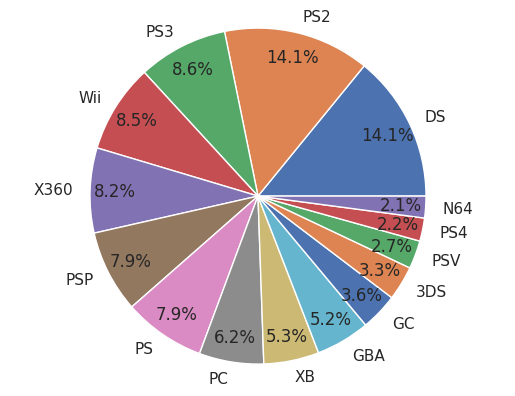

In [282]:
import matplotlib.pyplot as plt

counts = data['Platform'].value_counts().head(15)
plt.pie(counts, labels=counts.index, autopct='%1.1f%%',  pctdistance=0.85, labeldistance=1.1)
plt.axis('equal')
plt.show()               # Различные платформы игр

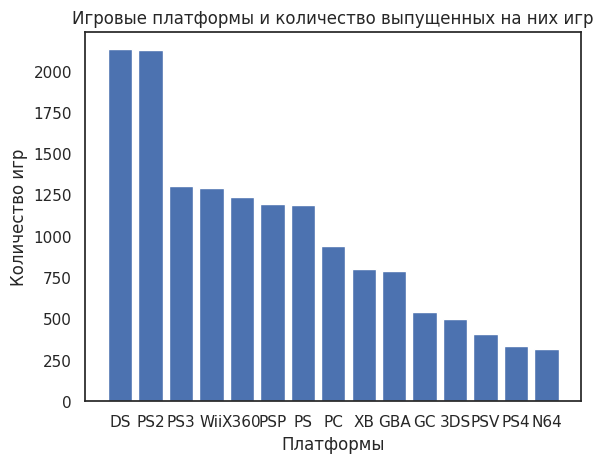

In [283]:
Platform_Name=data['Platform'].value_counts().index[:15]
plt.title("Игровые платформы и количество выпущенных на них игр")
plt.xlabel("Платформы")
plt.ylabel("Количество игр")
Platform_Count=data['Platform'].value_counts().head(15)
plt.bar(Platform_Name, Platform_Count)
plt.show()                            # Игровые платформы и количество выпущенных на них игр

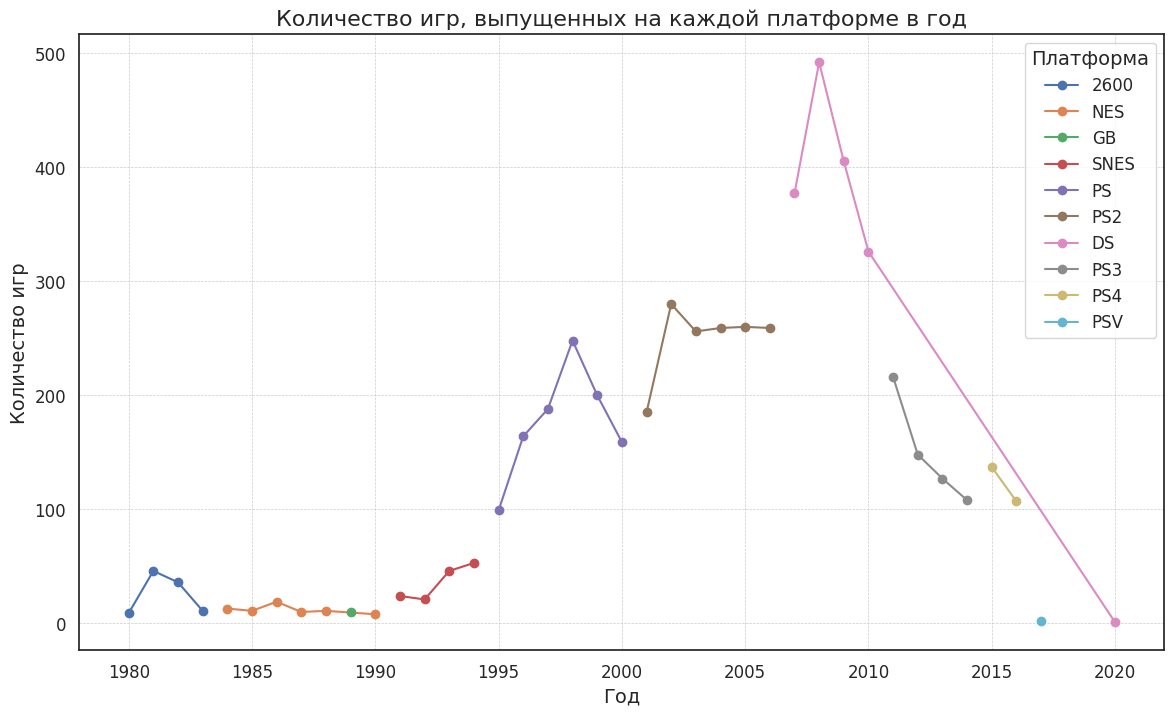

In [284]:
game_by_platform=data.groupby(['Platform','Year']).size().reset_index(name='game_count')
biggest_platforms_per_year = game_by_platform.loc[game_by_platform.groupby('Year')['game_count'].idxmax()]
biggest_platforms_per_year.reset_index(drop=True, inplace=True)
biggest_platforms_per_year.value_counts().head(15)


plt.figure(figsize=(14, 8))
for platform in biggest_platforms_per_year['Platform'].unique():
    platform_data = biggest_platforms_per_year[biggest_platforms_per_year['Platform'] == platform]
    plt.plot(platform_data['Year'], platform_data['game_count'], marker='o', label=platform)

plt.title('Количество игр, выпущенных на каждой платформе в год', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Количество игр', fontsize=14)
plt.legend(title='Платформа', fontsize=12, title_fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()                                                      

# Здесь мы видим, что основной платформой является playstation, и доля игр, созданных для Nintendo DS (https://ru.wikipedia.org/wiki/Nintendo_DS), продолжает снижаться по сравнению с пиком 
# достигнутым в период с 2005 по 2010 год

<Figure size 1400x800 with 0 Axes>

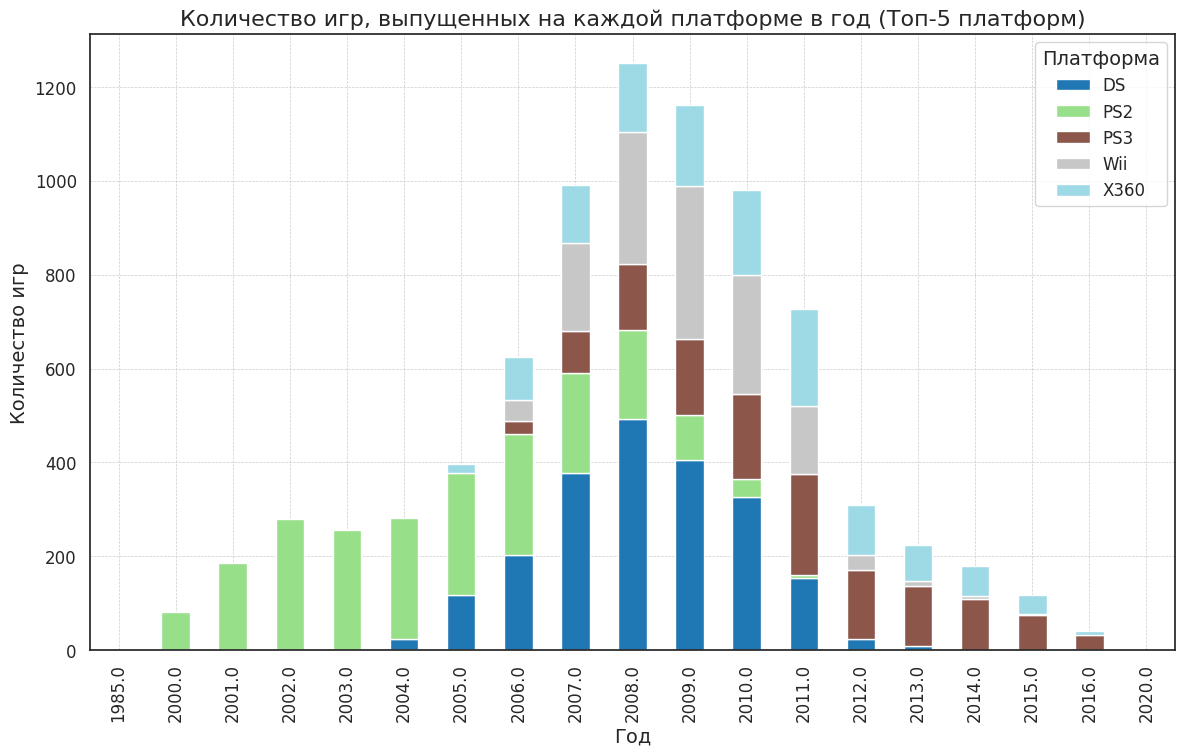

In [285]:
game_by_platform = data.groupby(['Platform', 'Year']).size().reset_index(name='game_count')
total_games_per_platform = game_by_platform.groupby('Platform')['game_count'].sum().reset_index()
top_10_platforms = total_games_per_platform.nlargest(5, 'game_count')['Platform']
filtered_game_by_platform = game_by_platform[game_by_platform['Platform'].isin(top_10_platforms)]
pivot_data = filtered_game_by_platform.pivot(index='Year', columns='Platform', values='game_count').fillna(0)
plt.figure(figsize=(14, 8))
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Количество игр, выпущенных на каждой платформе в год (Топ-5 платформ)', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Количество игр', fontsize=14)
plt.legend(title='Платформа', fontsize=12, title_fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

# https://en.wikipedia.org/wiki/PlayStation_(console)#/media/File:PlayStation-SCPH-1000-with-Controller.jpg   (Playstation)
# https://en.wikipedia.org/wiki/Nintendo_DS#/media/File:Nintendo-DS-Fat-Blue.jpg                          (Nintendo DS)

# Здесь мы замечаем, что интерес к портативным игровым консолям Nintendo DS был, но затем он угас, с появлением более мощных и продвинутых Playstation


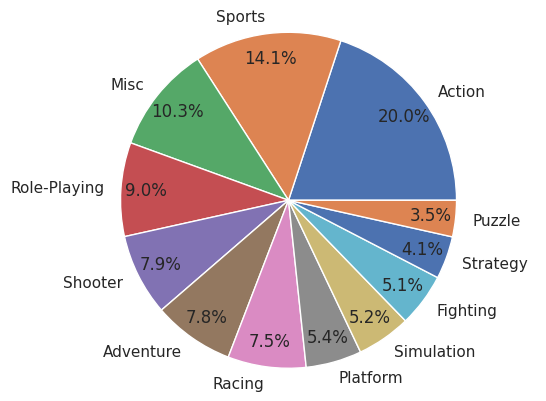

In [286]:
counts = data['Genre'].value_counts().head(15)
plt.pie(counts, labels=counts.index, autopct='%1.1f%%',  pctdistance=0.85, labeldistance=1.1)
plt.axis('equal')
plt.show()       # Разные игровые жанры

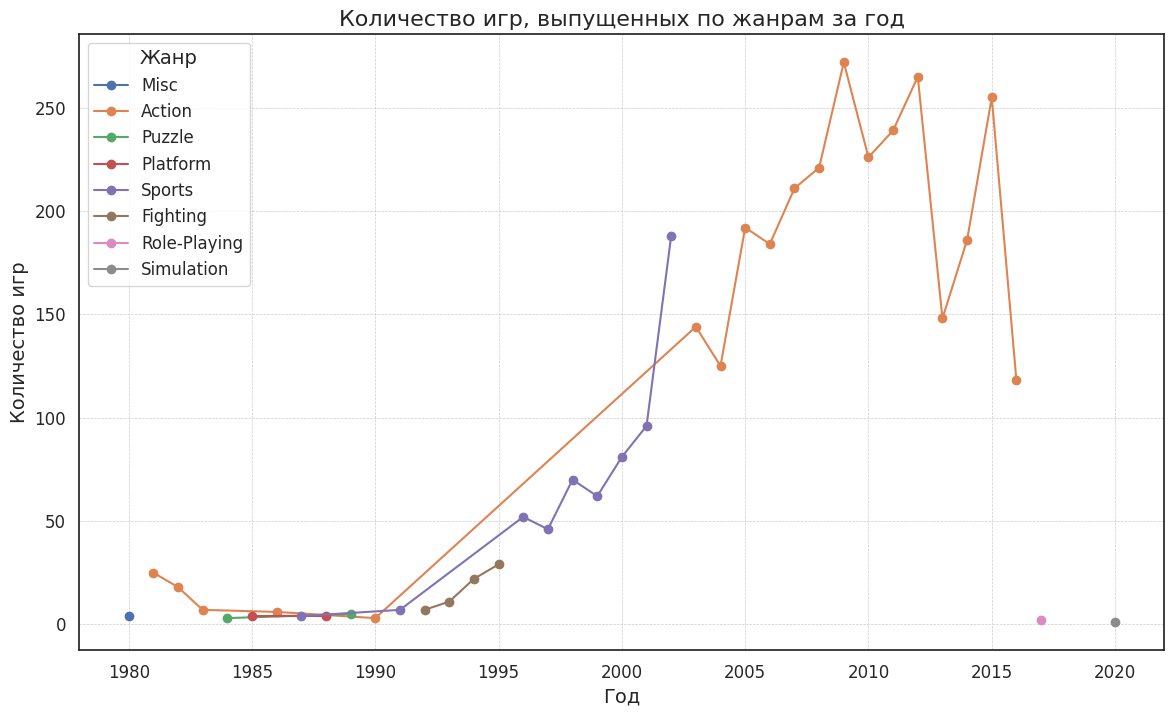

In [287]:
game_by_genre = data.groupby(['Genre', 'Year']).size().reset_index(name='game_count')
biggest_genre_per_year = game_by_genre.loc[game_by_genre.groupby('Year')['game_count'].idxmax()]
biggest_genre_per_year.reset_index(drop=True, inplace=True)
plt.figure(figsize=(14, 8))
for genre in biggest_genre_per_year['Genre'].unique():
    genre_data = biggest_genre_per_year[biggest_genre_per_year['Genre'] == genre]
    plt.plot(genre_data['Year'], genre_data['game_count'], marker='o', label=genre)

plt.title('Количество игр, выпущенных по жанрам за год', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Количество игр', fontsize=14)
plt.legend(title='Жанр', fontsize=12, title_fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()                                                           # Количество игр, выпущенных по жанрам за год 
                                                                # Мы можем видеть рост жанра боевика, но с 2000 по 2005 год мы можем наблюдать, как спорт берет верх над жанром боевика

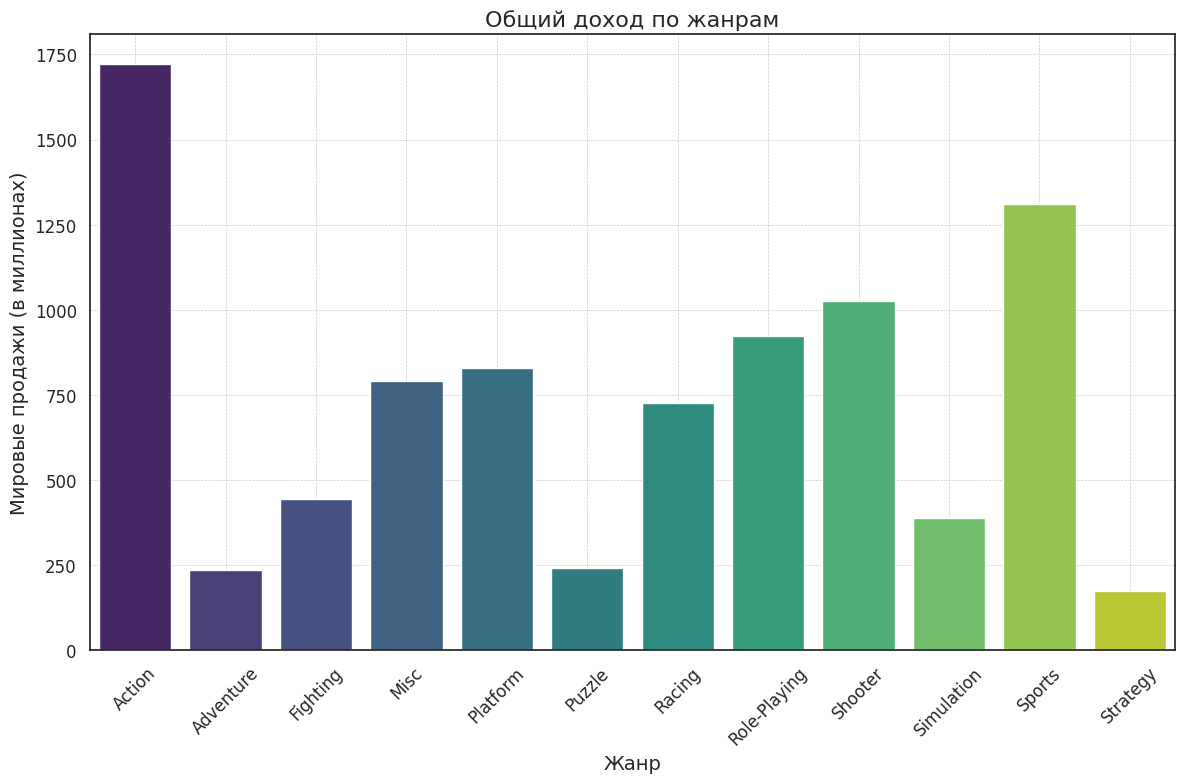

In [288]:
import seaborn as sns
genre_revenue = data.groupby('Genre')['Global_Sales'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(data=genre_revenue, x='Genre', y='Global_Sales', hue='Genre', palette='viridis', legend=False)
plt.title('Общий доход по жанрам', fontsize=16)
plt.xlabel('Жанр', fontsize=14)
plt.ylabel('Мировые продажи (в миллионах)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()
                                                                  # Мы можем сказать, что жанр, приносящий наибольший доход,- это боевик, за которым следуют спортивные


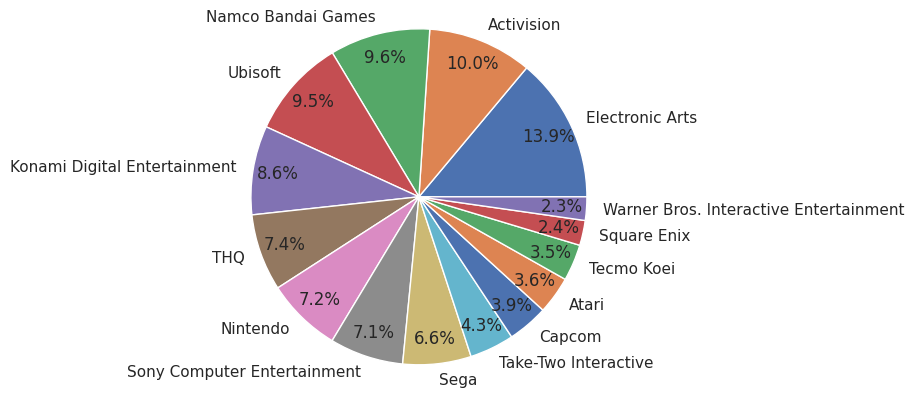

In [289]:
counts = data['Publisher'].value_counts().head(15)
plt.pie(counts, labels=counts.index, autopct='%1.1f%%',  pctdistance=0.85, labeldistance=1.1)
plt.axis('equal')
plt.show()   # Разные производители игр

<Figure size 1400x800 with 0 Axes>

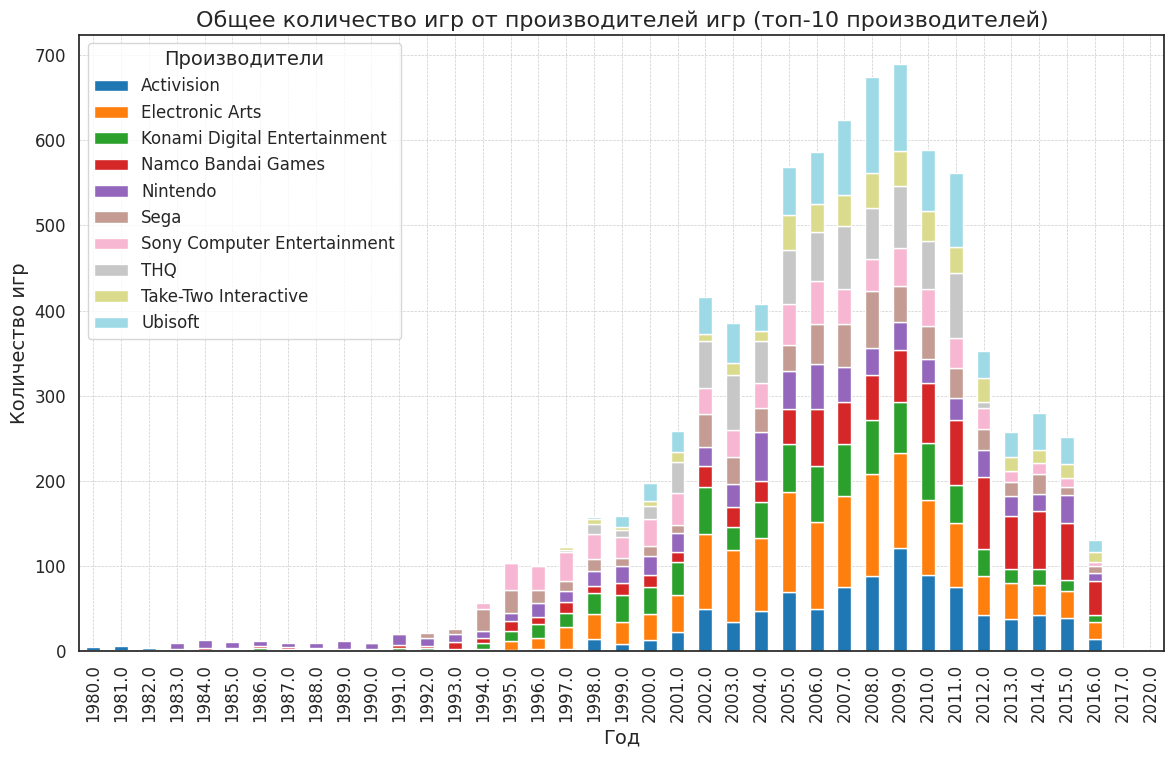

In [290]:

game_by_publisher = data.groupby(['Publisher', 'Year']).size().reset_index(name='game_count')
total_games_per_publisher = game_by_publisher.groupby('Publisher')['game_count'].sum().reset_index()
top_10_publisher = total_games_per_publisher.nlargest(10, 'game_count')['Publisher']
filtered_game_by_publisher = game_by_publisher[game_by_publisher['Publisher'].isin(top_10_publisher)]
pivot_data = filtered_game_by_publisher.pivot(index='Year', columns='Publisher', values='game_count').fillna(0)
plt.figure(figsize=(14, 8))
pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab20')
plt.title('Общее количество игр от производителей игр (топ-10 производителей)', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Количество игр', fontsize=14)
plt.legend(title='Производители', fontsize=12, title_fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


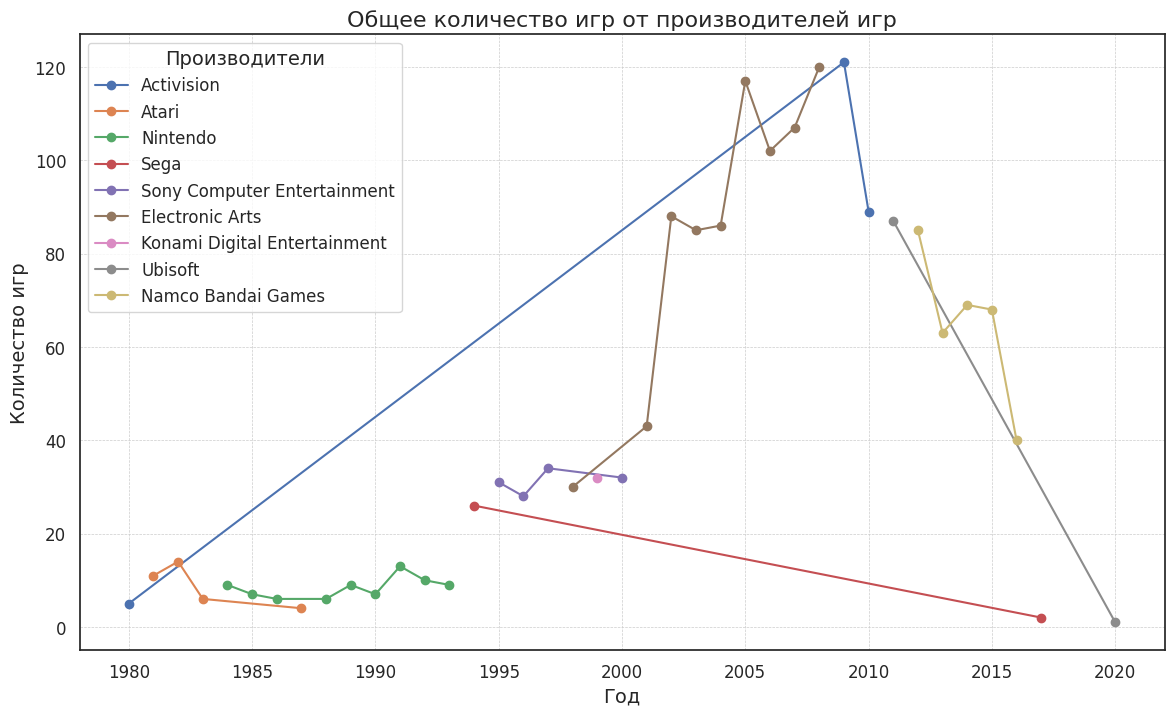

In [291]:
game_by_publisher = data.groupby(['Publisher', 'Year']).size().reset_index(name='game_count')
biggest_publisher_per_year = game_by_publisher.loc[game_by_publisher.groupby('Year')['game_count'].idxmax()]
biggest_publisher_per_year.reset_index(drop=True, inplace=True)
plt.figure(figsize=(14, 8))
for publisher in biggest_publisher_per_year ['Publisher'].unique():
    publisher_data = biggest_publisher_per_year [biggest_publisher_per_year ['Publisher'] == publisher]
    plt.plot(publisher_data['Year'], publisher_data['game_count'], marker='o', label=publisher)

plt.title('Общее количество игр от производителей игр', fontsize=16)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Количество игр', fontsize=14)
plt.legend(title='Производители', fontsize=12, title_fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()                                                           # Количество игр, выпущенных по жанрам за год 
              


---

##  Матрица корреляции 

---

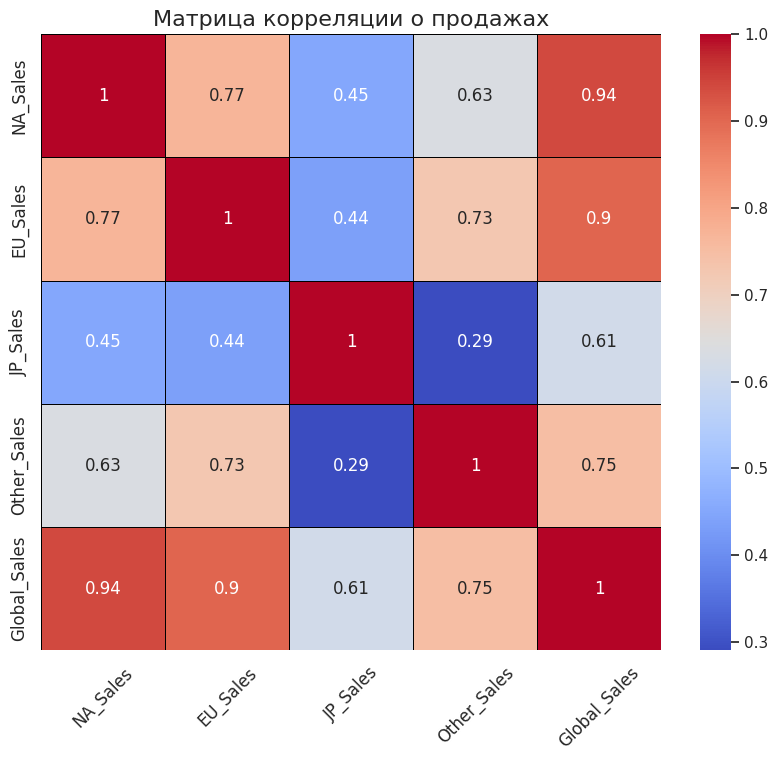

In [292]:
sales_data = data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
correlation_matrix = sales_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Матрица корреляции о продажах', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()


- ```NA_Sales/ Global_Sales ```  := Продажи в Северной Америке имеют очень высокую корреляцию с мировыми продажами. Это говорит о том, что значительная часть мировых продаж приходится на Северную Америку.
- ```NA_Sales/ EU_Sales```  := Продажи в Северной Америке и Европе сильно коррелируют.  Это говорит о том, что игры, популярные в одном из этих регионов, скорее всего, будут популярны и в другом.
- ```NA_Sales/ JP_Sales```  := Продажи в Японии имеют более низкую корреляцию с продажами в Северной Америке, что говорит о том, что игры, популярные в Японии, могут быть не так популярны в Северной Америке.



---

## Общий вывод

---

- Самый популярный жанр - боевик, и он приносит наибольший доход, поэтому мы должны ориентироваться именно на него
- Самым популярным устройством, для которого создаются игры, является playstation, поэтому имеет смысл создавать игры для нее
- Целевой рынок - Северная Америка или Европа, поскольку игра, популярная на одном из рынков, становится популярной и на другом
